#### 선형회귀(Linear Regression)
- 문제(X)와 정답(y)와의 선형 관계를 학습하여 모델링하는 방법
- 선형 함수(규칙)를 통해 미래의 데이터에 대해 예측을 수행


1. 선형회귀 2가지
    - OLS(Oridinary Least Square, 최소제곱법) : 수학적 공식을 이용한 해석적 방법
    : 데이터가 선형 관계를 따르고, 복잡하지 않을 때 수학적으로 정확한 해(w,b)를 찾음
    : 수식을 이용한 해석적 방법이기에, 해(w,b)는 고정적으로 산출됨

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.DataFrame({"시간": [2,4,6,9],"성적":[20,40,80,90]})

In [3]:
data

,시간,성적
0,2,20
1,4,40
2,6,80
3,9,90


In [4]:
#모델 불러오기
from sklearn.linear_model import LinearRegression #최소자승법 수학공식을 적용한 해석적 방법


In [25]:
l_model = LinearRegression()

In [26]:
l_model.fit(data[["시간"]],data["성적"])

LinearRegression()

In [27]:
#모델 예측
l_model.predict([[7]])
# 아래 경고문은 데이터 학습시 컬럼이 존재했는데, predict할때는 컬럼명이 없다고 경고하는 것.

c:\Users\SMHRD\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([75.98130841])

In [28]:
print("가중치 :",l_model.coef_) #가중치 coefficient
print("절편 :",l_model.intercept_) #절편
# 절편은 거의 0이라고 생각하면 됨(e표기법: 소수점을 +,- 방향으로 보내주고나면 해석 가능)


가중치 : [10.56074766]
절편 : 2.0560747663551524


2. 경사하강법(Gradient Descent)
- 선형 모델의 손실함수(주로 MSE, 평균제곱오차)의 값이 가장 최소가 되는 w(가중치)와 b(절편)을 찾는 방법
    - 1. 파라미터 초기화 : w와 b를 임의의 값으로 초기화
    - 2. 예측 : 현재 w와 b를 활용해서 예측
    - 3. 오차계산 : 예측값과 실제값의 오차 계산
    - 4. 기울기계산 : Loss(손실함수 값)이 낮아지는 방향을 찾기 위해, 기울기를 계산
                     학습률(learning rate) : 기울기의 보폭을 조정
    - 5. 파라미터 업데이트 : 기울기와 학습률을 사용해서, 파라미터(w,b)를 업데이트

In [29]:
# 가설 함수 설정
def h(w,x):
    return (w*x)+0 # 예측값

In [30]:
# 손실함수(Loss Function, 비용함수, Cost Function...)설정
# 오차값을 뽑아내는 도구 : MSE
def cost(data, target,weight):
    y_pred = h(weight,data)
    mse = ((y_pred-target)**2).mean()
    return mse

In [31]:
cost(data["시간"],data["성적"],10) #가중치가 10인경우의 Loss값 : 0

100.0

In [32]:
cost(data["시간"],data["성적"],4) # 가중치가 전역 최소값에서 멀어지면 멀어질수록, 오차가 극대화!

1693.0

#### w 값에 따른 mse 변화율 그래프 그리기

In [34]:
w_arr = range(-10,31) #x축의 범위 그려보고자 하는 w값의 범위

In [35]:
# 리스트 컨프리헨션 : list append 문법
cost_lost = [cost(data["시간"],data["성적"],w) for w in w_arr]
cost_lost

[15000.0,
 13604.25,
 12277.0,
 11018.25,
 9828.0,
 8706.25,
 7653.0,
 6668.25,
 5752.0,
 4904.25,
 4125.0,
 3414.25,
 2772.0,
 2198.25,
 1693.0,
 1256.25,
 888.0,
 588.25,
 357.0,
 194.25,
 100.0,
 74.25,
 117.0,
 228.25,
 408.0,
 656.25,
 973.0,
 1358.25,
 1812.0,
 2334.25,
 2925.0,
 3584.25,
 4312.0,
 5108.25,
 5973.0,
 6906.25,
 7908.0,
 8978.25,
 10117.0,
 11324.25,
 12600.0]

In [36]:
# 선 그래프로 출력
import matplotlib.pyplot as plt

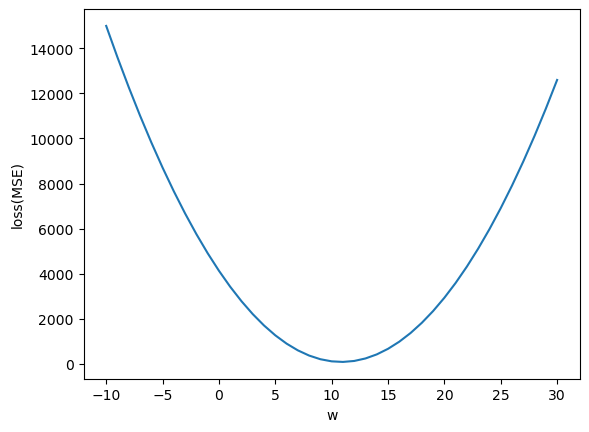

In [37]:
plt.plot(w_arr,cost_lost)
plt.xlabel("w")
plt.ylabel("loss(MSE)")


plt.show()



### SGD Regressor
- 사이킷런이 구성해놓으 ㄴ경사하강법을 활용한 선형 회귀 모델

In [38]:
from sklearn.linear_model import SGDRegressor
# 위에서 진행했었던 LinearRegression 모델은 하이퍼파라미터가 없었지만,
# 경사하강법을 사용한 SGDRegressor는 하이퍼 파라미터가 존재함

In [41]:
sgd_model = SGDRegressor(eta0=0.01,
                         max_iter=500,
                         verbose=1)

In [ ]:
sgd_model.fit(data[["시간"]],data["성적"])

In [ ]:
# Loss값이 클수록 안좋다.
